In [389]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, plot_roc_curve, plot_precision_recall_curve, classification_report
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Описание данных

<table style="width:50%">
<tr>
<th> Признак </th>
<th> Описание признака </th>
</tr>

<tr>
<td> RowNumber </td>
<td> Индекс строки в данных </td>
</tr>

<tr>
<td> CustomerId </td>
<td> Уникальный идентификатор клиента </td>
</tr>

<tr>
<td> Surname </td>
<td> Фамилия </td>
</tr>

<tr>
<td> CreditScore </td>
<td> Кредитный скоринг </td>
</tr>

<tr>
<td> Geography </td>
<td> Страна проживания </td>
</tr>

<tr>
<td> Gender </td>
<td> Пол </td>
</tr>

<tr>
<td> Age </td>
<td> Возраст </td>
</tr>

<tr>
<td> Tenure </td>
<td> Количество недвижимости у клиента </td>
</tr>

<tr>
<td> Balance </td>
<td> Баланс на счете </td>
</tr>

<tr>
<td> NumOfProducts </td>
<td> Количество продуктов банка, используемых клиентом </td>
</tr>

<tr>
<td> HasCrCard </td>
<td> Наличие кредитной карты </td>
</tr>

<tr>
<td> IsActiveMember </td>
<td> Активность клиента </td>
</tr>

<tr>
<td> EstimatedSalary </td>
<td> Предполагаемая зарплата </td>
</tr>

<tr>
<td> Exited </td>
<td> Факт ухода клиента (Целевой признак) </td>
</tr>

</table>

In [390]:
data = pd.read_csv('data/Churn_Modelling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [391]:
print(f'Количество строк: {data.shape[0]}')
print(f'Количество столбцов: {data.shape[1]}')

Количество строк: 10000
Количество столбцов: 14


Посмотрим информацию о фрейме данных

In [392]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Посмотрим описательную статистику

In [393]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Проверим данные на наличие дубликатов

In [394]:
print(f'Количество дубликатов: {data.duplicated().sum()}')

Количество дубликатов: 0


Посмотрим на количество уникалиных значений в данных

In [395]:
for col in data.columns:
	print(f'{col}: Количество уникальных значений {len(data[col].unique())}')

RowNumber: Количество уникальных значений 10000
CustomerId: Количество уникальных значений 10000
Surname: Количество уникальных значений 2932
CreditScore: Количество уникальных значений 460
Geography: Количество уникальных значений 3
Gender: Количество уникальных значений 2
Age: Количество уникальных значений 70
Tenure: Количество уникальных значений 11
Balance: Количество уникальных значений 6382
NumOfProducts: Количество уникальных значений 4
HasCrCard: Количество уникальных значений 2
IsActiveMember: Количество уникальных значений 2
EstimatedSalary: Количество уникальных значений 9999
Exited: Количество уникальных значений 2


Отметим, что в колонках RowNumber и CustomerId каждое значение является уникальным,  
это не представляет ценности для дальнейшего анализа, поэтому эти колонки можно удалить

In [396]:
data.drop(columns={'RowNumber', 'CustomerId'}, inplace=True)

Проверим набор данных на наличие отсутствующих значений

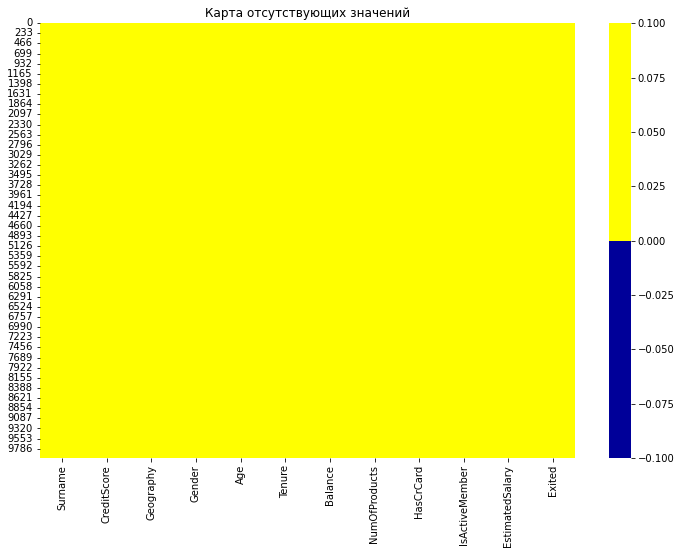

In [397]:
plt.figure(figsize=(12,8))
colours =['#000099','#ffff00']
sns.heatmap(data.isnull(), cmap=sns.color_palette(colours))
plt.title('Карта отсутствующих значений')
plt.show()

In [398]:
for col in data.columns:
	print(f'{col}: Количество отсутствующих значений {data[col].isnull().sum()}')

Surname: Количество отсутствующих значений 0
CreditScore: Количество отсутствующих значений 0
Geography: Количество отсутствующих значений 0
Gender: Количество отсутствующих значений 0
Age: Количество отсутствующих значений 0
Tenure: Количество отсутствующих значений 0
Balance: Количество отсутствующих значений 0
NumOfProducts: Количество отсутствующих значений 0
HasCrCard: Количество отсутствующих значений 0
IsActiveMember: Количество отсутствующих значений 0
EstimatedSalary: Количество отсутствующих значений 0
Exited: Количество отсутствующих значений 0


Проверим данные на наличие выбросов

Для определения выбросов в признаках 'CreditScore', 'Balance', 'EstimatedSalary' построим графики

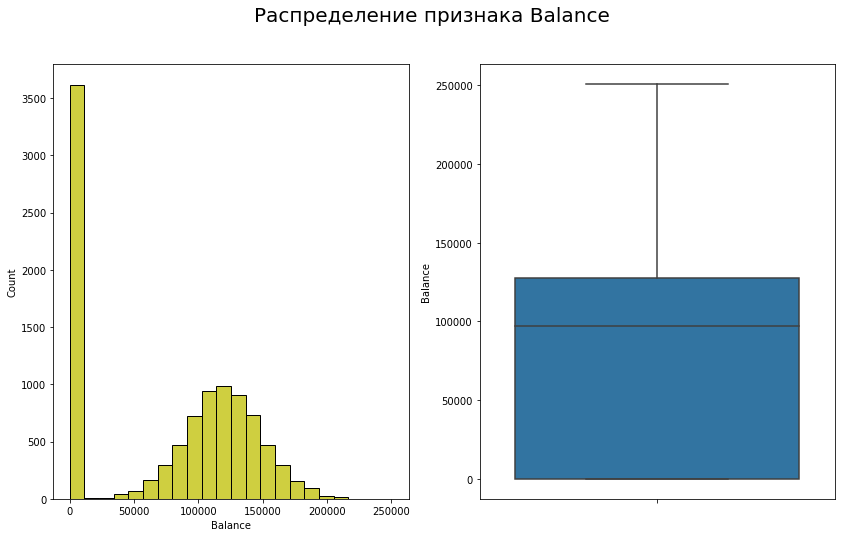

In [399]:
fig, axes = plt.subplots(1, 2, figsize=(14, 8))
fig.suptitle('Распределение признака Balance', fontsize=20)

sns.histplot(ax=axes[0], data=data, x="Balance", color='y');
sns.boxplot(ax=axes[1], data=data, y="Balance");

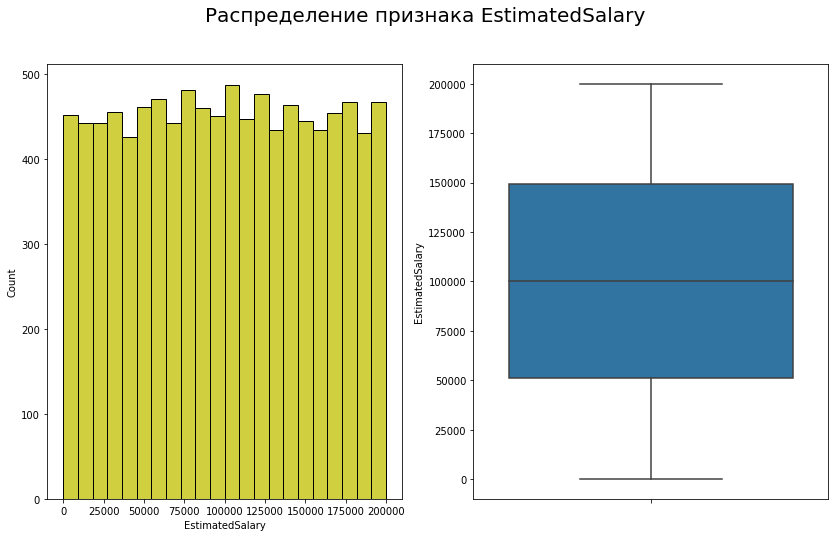

In [400]:
fig, axes = plt.subplots(1, 2, figsize=(14, 8))
fig.suptitle('Распределение признака EstimatedSalary', fontsize=20)

sns.histplot(ax=axes[0], data=data, x="EstimatedSalary", color='y');
sns.boxplot(ax=axes[1], data=data, y="EstimatedSalary");

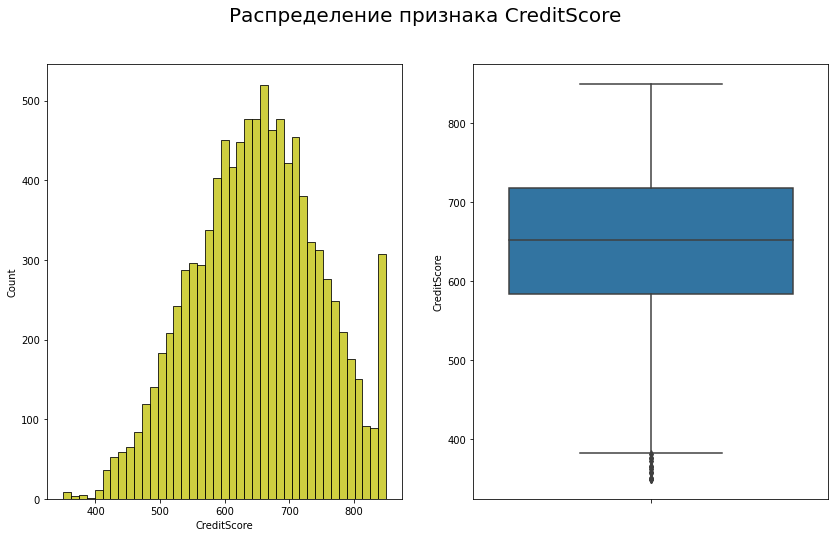

In [401]:
fig, axes = plt.subplots(1, 2, figsize=(14, 8))
fig.suptitle('Распределение признака CreditScore', fontsize=20)

sns.histplot(ax=axes[0], data=data, x="CreditScore", color='y');
sns.boxplot(ax=axes[1], data=data, y="CreditScore");

На основании построенных графиков можно сделать следующий вывод:
- В признаках EstimatedSalary, Balance выбросы отсутствуют
- В признаке CreditScore присутствуют небольшое количество "нижних" выбросов

Рассмотрим отдельно часть данных без выбросов и сами выбросы. Для этого найдем интерквартильное расстояние и "максимум", а далее по нему произведем отсев.

In [402]:
inq_range = data["CreditScore"].quantile(q=0.75) - data["CreditScore"].quantile(q=0.25)
min_creditscore = data["CreditScore"].quantile(q=0.25) - 1.5 * inq_range
min_creditscore

383.0

In [403]:
data_without_outliers = data[data["CreditScore"] >= min_creditscore]
data_outliers = data[data["CreditScore"] < min_creditscore]

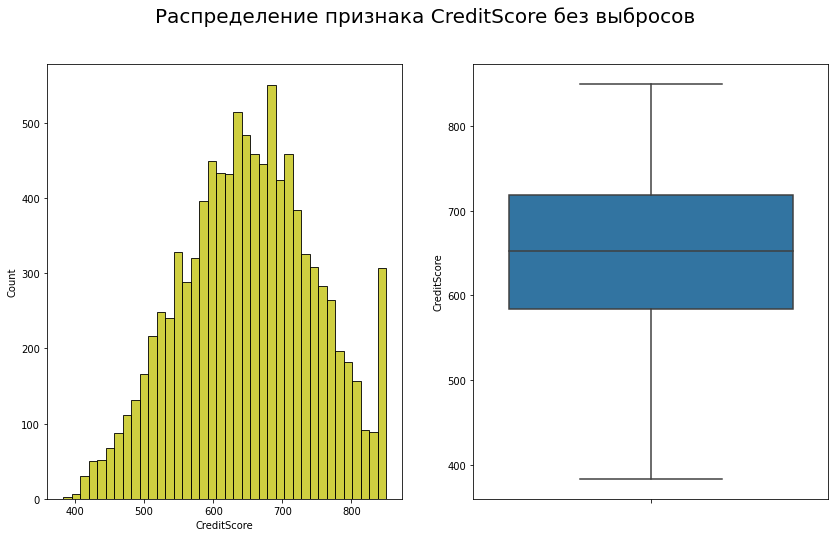

In [404]:
fig, axes = plt.subplots(1, 2, figsize=(14, 8))
fig.suptitle('Распределение признака CreditScore без выбросов', fontsize=20)

sns.histplot(ax=axes[0], data=data_without_outliers, x="CreditScore", color='y');
sns.boxplot(ax=axes[1], data=data_without_outliers, y="CreditScore");

Посмотрим на зависимость выбросов от признаков, которые могут повлиять на уход клиента

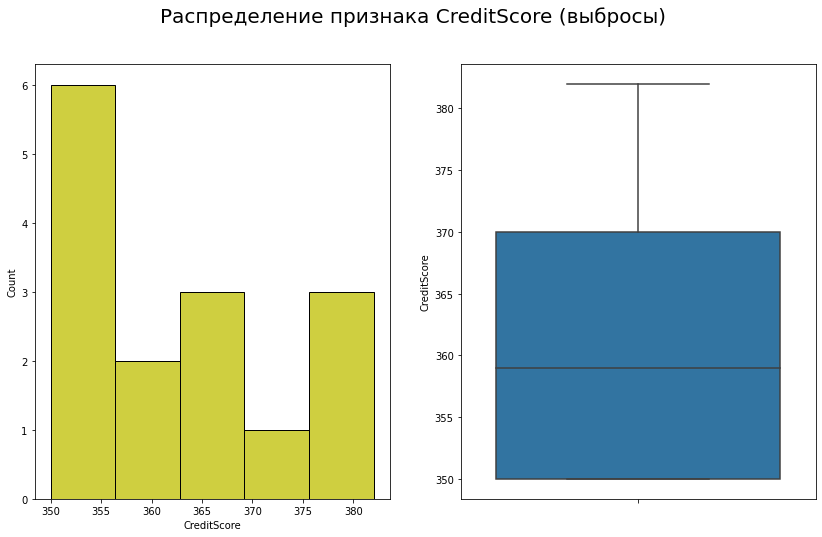

In [405]:
fig, axes = plt.subplots(1, 2, figsize=(14, 8))
fig.suptitle('Распределение признака CreditScore (выбросы)', fontsize=20)

sns.histplot(ax=axes[0], data=data_outliers, x="CreditScore", color='y');
sns.boxplot(ax=axes[1], data=data_outliers, y="CreditScore");

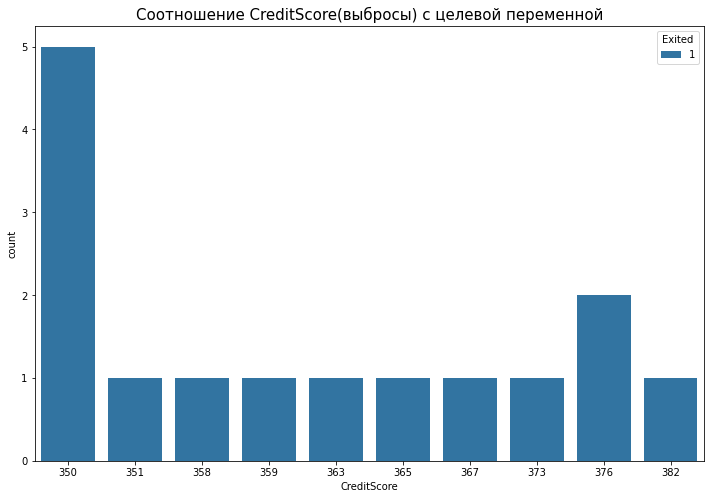

In [406]:
fig = plt.figure(figsize=(12, 8))
sns.countplot(x="CreditScore", hue="Exited", data=data_outliers);
plt.title("Соотношение CreditScore(выбросы) с целевой переменной", {"fontsize": 15});

Мы видим, что клиенты у которых значение CreditScore находиться в области "нижних выбросов", перестают пользоваться услугами компании.   
Данные выбросы мы оставляем в датасете, так как они могут быть правдивыми.

Рассмотрим каждый признак по отдельности.

In [407]:
data.groupby('Exited')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,7963.0,37.408389,10.125363,18.0,31.0,36.0,41.0,92.0
1,2037.0,44.837997,9.761562,18.0,38.0,45.0,51.0,84.0


На основании данных мы видим, что для ушедших клиентов средний возраст составляет 44,8, а для клиентов, которые остались 37,4.

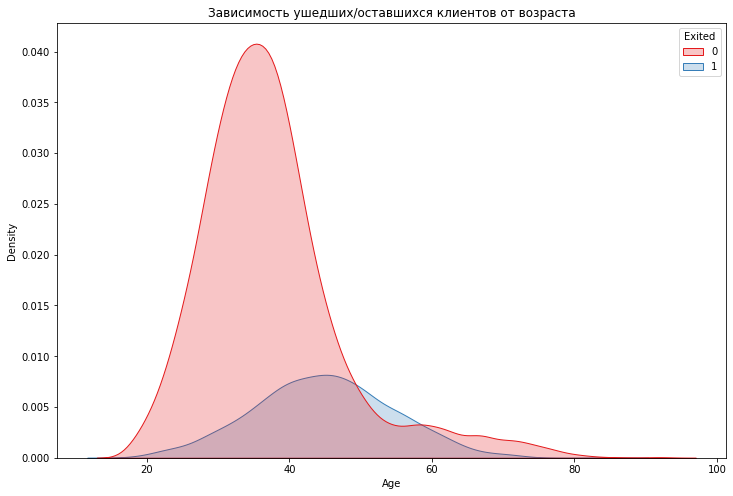

In [408]:
plt.figure(figsize=(12,8))
sns.kdeplot(x='Age',data=data, hue='Exited', shade=True, palette="Set1" ).set_title("Зависимость ушедших/оставшихся клиентов от возраста")
plt.show()

Из графика видно:
- большинство клиентов нашей компании являются людьми в возрасте от 22 до 52 лет.
- Люди в возрасте до 20 лет и от 70 лет крайне редко отказываются от услуг компании

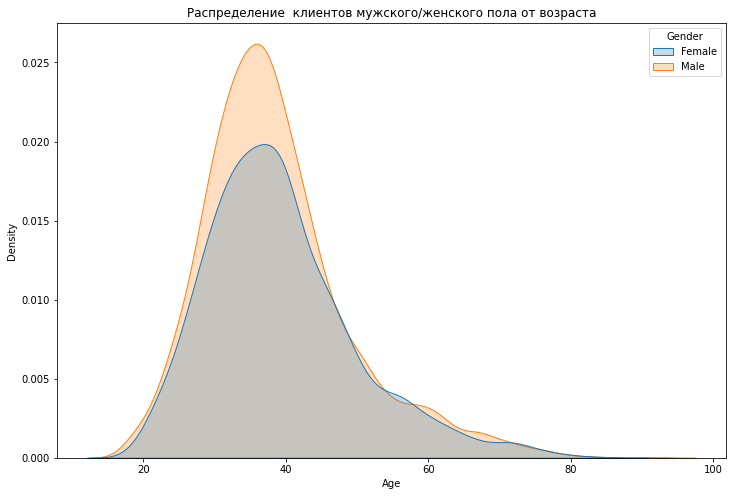

In [409]:
plt.figure(figsize=(12,8))
sns.kdeplot(x='Age',data=data, hue='Gender', shade=True).set_title("Распределение  клиентов мужского/женского пола от возраста")
plt.show()

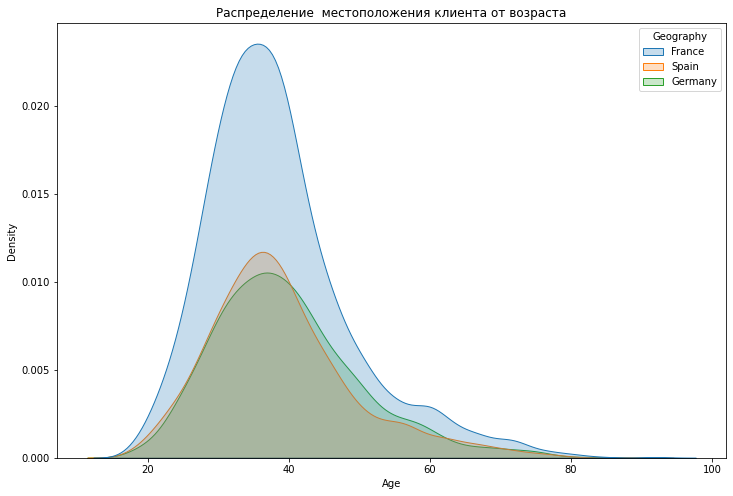

In [410]:
plt.figure(figsize=(12,8))
sns.kdeplot(x='Age',data=data, hue='Geography', shade=True).set_title("Распределение  местоположения клиента от возраста")
plt.show()

In [411]:
data['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [412]:
data.groupby('Exited')['NumOfProducts'].describe()

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,7963.0,1.544267,0.509536,1.0,1.0,2.0,2.0,3.0
1,2037.0,1.475209,0.801521,1.0,1.0,1.0,2.0,4.0


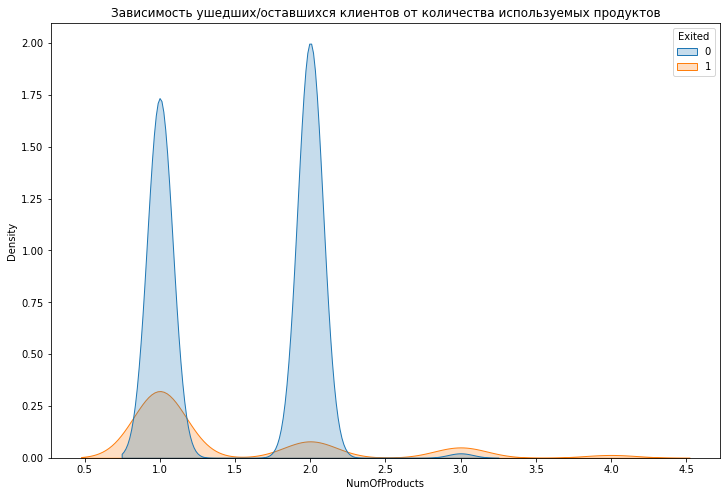

In [413]:
plt.figure(figsize=(12,8))
sns.kdeplot(x='NumOfProducts',data=data, hue='Exited', shade=True).set_title("Зависимость ушедших/оставшихся клиентов от количества используемых продуктов")
plt.show()

Из графиков мы видим, что клиенты, которые использовали 4 продукта банка, отказывались от услуг банка

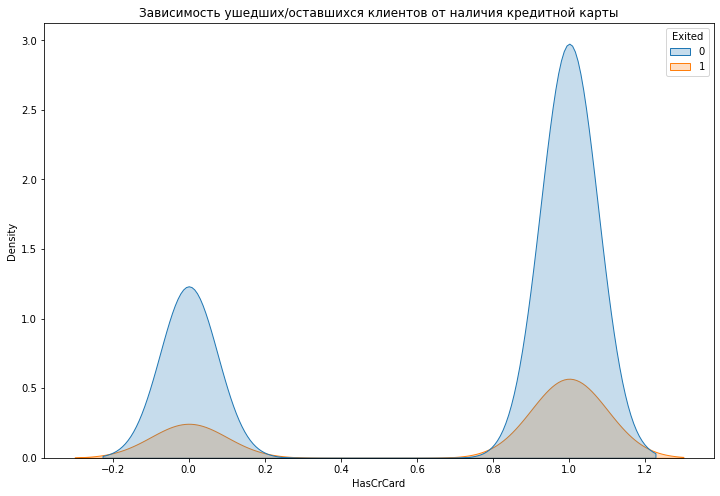

In [414]:
plt.figure(figsize=(12,8))
sns.kdeplot(x='HasCrCard',data=data, hue='Exited', shade=True).set_title("Зависимость ушедших/оставшихся клиентов от наличия кредитной карты")
plt.show()

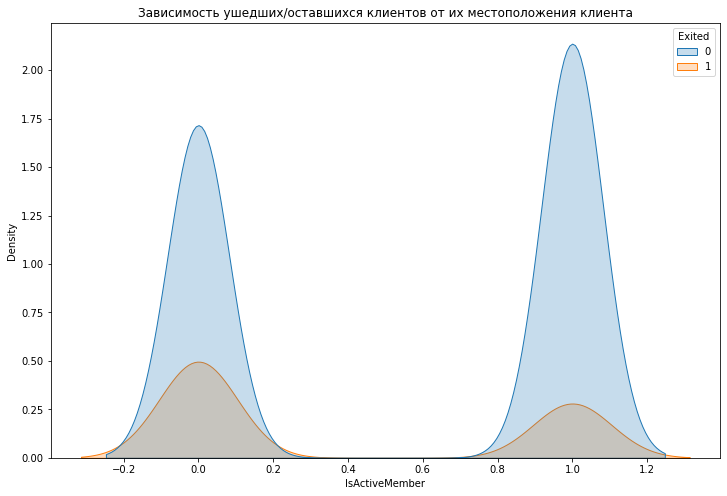

In [415]:
plt.figure(figsize=(12,8))
sns.kdeplot(x='IsActiveMember',data=data, hue='Exited', shade=True).set_title("Зависимость ушедших/оставшихся клиентов от их местоположения клиента")
plt.show()

Более активные клиенты, реже отказываются от услуг компании.

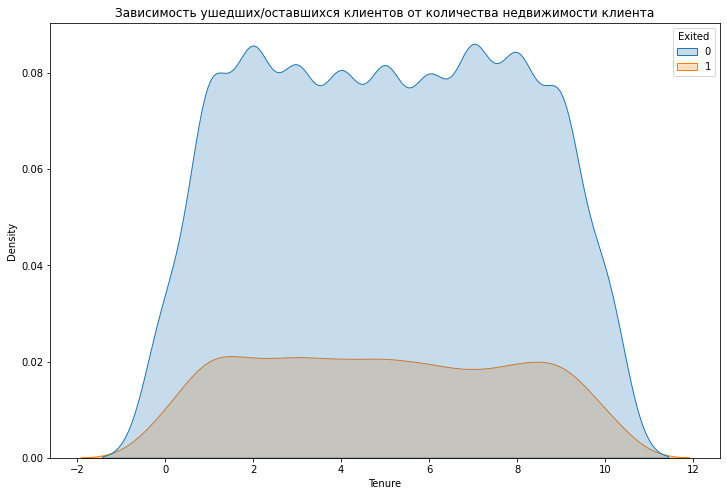

In [416]:
plt.figure(figsize=(12,8))
sns.kdeplot(x='Tenure',data=data, hue='Exited', shade=True).set_title("Зависимость ушедших/оставшихся клиентов от количества недвижимости клиента")
plt.show()

Посмотрим каких клиентов больше в компании,у которых есть кредитные карты и нулевой баланс и зарплата ниже среднего, либо наооборот.

In [417]:
print(f"Число клиентов с нулевым балансом и кредитными карта и зарплатой ниже среднего - {len(data.query('Balance == 0 & HasCrCard != 0 & EstimatedSalary < EstimatedSalary.mean()'))}")
print(f"Число клиентов с ненулевым балансом и отсутствием кредных карт и зарплатой выше среднего - {len(data.query('Balance != 0 & HasCrCard == 0 & EstimatedSalary > EstimatedSalary.mean()'))}")

Число клиентов с нулевым балансом и кредитными карта и зарплатой ниже среднего - 1335
Число клиентов с ненулевым балансом и отсутствием кредных карт и зарплатой выше среднего - 979


Как мы видим клиентов с очень тяжелой ситуацией немного больше, чем финансово благополучных клиентов.  
Навряд ли клиенты первой категории откажуться от услуг компании.

Посмотрим на целевую переменную                                                                                   

In [418]:
data['Exited'].value_counts()
data

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


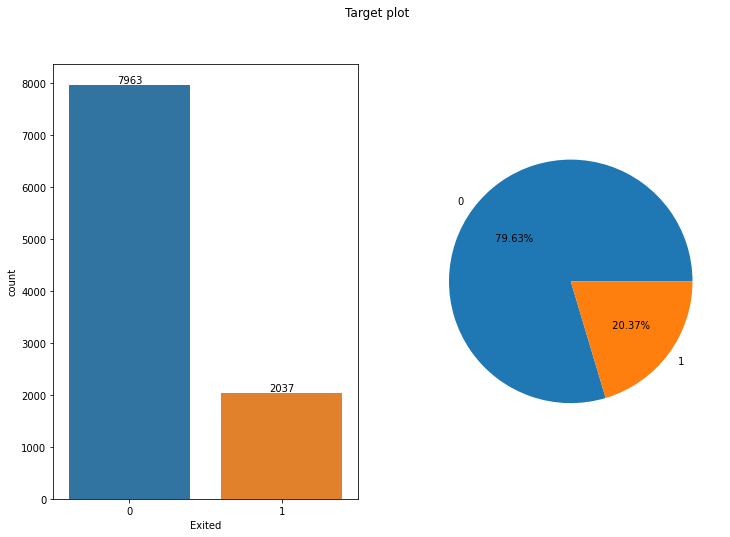

In [419]:
plt.figure(figsize=(12,8))

plt.subplot(121)
ax = sns.countplot(data=data,x='Exited')
ax.bar_label(ax.containers[0])

plt.subplot(122)
plt.pie(x = data['Exited'].value_counts(),autopct='% .2f%%',labels = data['Exited'].value_counts().index)

plt.suptitle("Target plot")
plt.show()

Присутствует дисбаланс классов. Для исправления этого можно будет использовать:
- Undersampling
- Oversampling
- SMOTE

Произведем корелляционный анализ.  
Построим матрицу корреляций между признаками.

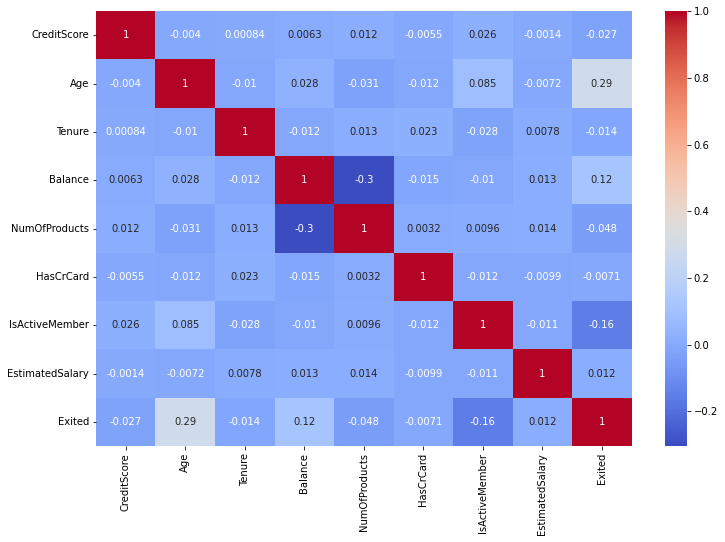

In [420]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot = True,cmap='coolwarm')
plt.show()

Как видно из таблицы наибольшая корелляция присутсвует между целевым признаком 'Exited' и 'Age' - 0.29.  
Так же присутвует небольшая корреляция между целевым признаком 'Exited' и 'Balance'.  
Присутствует небольшая отрицательная корреляция между целевым признаком 'Exited' и 'IsActiveMember'.

Закодируем категориальные признаки, удалим столбец Surname, он является неинформативным.

In [421]:
data['Gender'].replace({'Female':0,'Male':1},inplace=True)
data = pd.get_dummies(data=data,columns=['Geography'])
data.drop(columns={'Surname'}, inplace=True)
data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1,0


Стандартизируем признаки

In [422]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(data[numeric])
data[numeric] = scaler.transform(data[numeric])

Разделим выборку на трейн и тест в соотношении 70:30

In [423]:
X = data.drop(['Exited'], axis=1)
y = data['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

LogisticRegression

Сначала обучим модель без использования механизмов настройки классов,  затем использую сэмплирование (Undersampling, Oversampling, SMOTE)

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      2393
           1       0.39      0.69      0.50       607

    accuracy                           0.71      3000
   macro avg       0.64      0.71      0.65      3000
weighted avg       0.80      0.71      0.74      3000

LogisticRegression roc_auc_score is 0.77


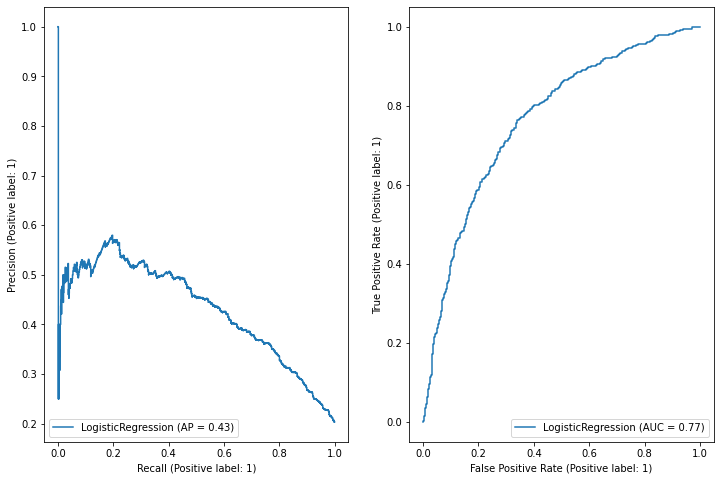

In [424]:
lr = LogisticRegression(solver='liblinear', class_weight = 'balanced')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))
proba = lr.predict_proba(X_test)
proba = proba[:, 1]
score = np.round(roc_auc_score(y_test, proba), 2)
print(f'LogisticRegression roc_auc_score is {score}')

res = pd.DataFrame([score], columns = ['ROC_AUC_DB'], index = ['LogisticRegression'])
g, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

plot_precision_recall_curve(lr, X_test, y_test, ax=ax1)
plot_roc_curve(lr, X_test, y_test, ax=ax2);


Используем Undersampling суть алгоритма заключается в удалении элементов из большего класса.

In [425]:
count_class_0, count_class_1 = data.Exited.value_counts()

class_0 = data[data['Exited'] == 0]
class_1 = data[data['Exited'] == 1]

In [426]:
class_0_under = class_0.sample(count_class_1)
test_under = pd.concat([class_0_under, class_1], axis=0)

print('Random undersampling:')
print(test_under.Exited.value_counts())

Random undersampling:
0    2037
1    2037
Name: Exited, dtype: int64


In [427]:
X = test_under.drop('Exited',axis='columns')
y = test_under['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15, stratify=y)

              precision    recall  f1-score   support

           0       0.69      0.70      0.70       612
           1       0.70      0.69      0.69       611

    accuracy                           0.69      1223
   macro avg       0.69      0.69      0.69      1223
weighted avg       0.69      0.69      0.69      1223

LogisticRegression roc_auc_score is 0.76


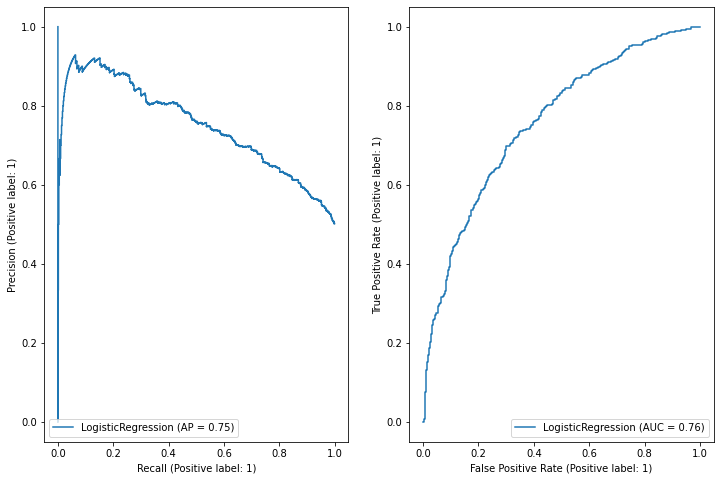

In [428]:
lr_us = LogisticRegression(solver='liblinear')
lr_us.fit(X_train, y_train)
y_pred = lr_us.predict(X_test)
print(classification_report(y_test, y_pred))
proba = lr_us.predict_proba(X_test)
proba = proba[:, 1]
score = np.round(roc_auc_score(y_test, proba), 2)
print(f'LogisticRegression roc_auc_score is {score}')
res['ROC_AUC_US'] = score
g, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

plot_precision_recall_curve(lr_us, X_test, y_test, ax=ax1)
plot_roc_curve(lr_us, X_test, y_test, ax=ax2);

Oversampling - суть алгоритма заключается в добавлении большего количества элементов в меньший класс.

In [429]:
class_1_over = class_1.sample(count_class_0, replace=True)
test_over = pd.concat([class_0, class_1_over], axis=0)

print('Random oversampling:')
print(test_over.Exited.value_counts())

Random oversampling:
0    7963
1    7963
Name: Exited, dtype: int64


In [430]:
X = test_over.drop('Exited',axis='columns')
y = test_over['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15, stratify=y)

              precision    recall  f1-score   support

           0       0.70      0.72      0.71      2389
           1       0.71      0.69      0.70      2389

    accuracy                           0.70      4778
   macro avg       0.70      0.70      0.70      4778
weighted avg       0.70      0.70      0.70      4778

LogisticRegression roc_auc_score is 0.78


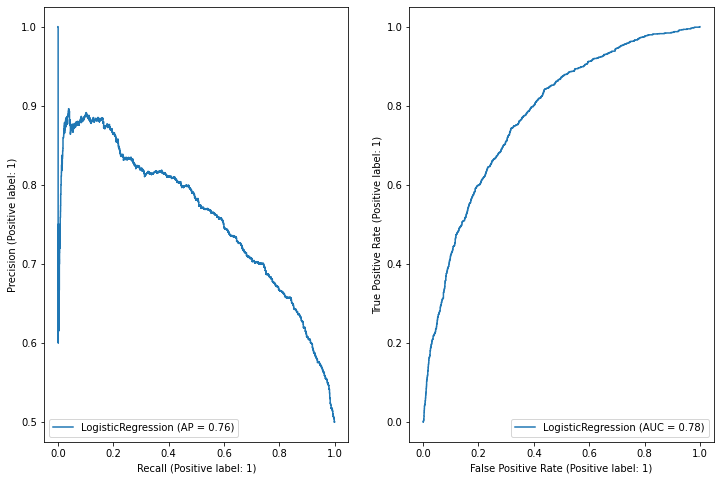

In [431]:
lr_os = LogisticRegression(solver='liblinear')
lr_os.fit(X_train, y_train)
y_pred = lr_os.predict(X_test)
print(classification_report(y_test, y_pred))
proba = lr_os.predict_proba(X_test)
proba = proba[:, 1]
score = np.round(roc_auc_score(y_test, proba), 2)
print(f'LogisticRegression roc_auc_score is {score}')
res['ROC_AUC_OS'] = score
g, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

plot_precision_recall_curve(lr_os, X_test, y_test, ax=ax1)
plot_roc_curve(lr_os, X_test, y_test, ax=ax2);

SMOTE - суть алгоритма в создании элементов в непосредственной близости от уже существующих в меньшем классе.

In [432]:
X = data.drop('Exited',axis='columns')
y = data['Exited']

In [433]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

In [434]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=15, stratify=y_sm)

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      2389
           1       0.73      0.73      0.73      2389

    accuracy                           0.73      4778
   macro avg       0.73      0.73      0.73      4778
weighted avg       0.73      0.73      0.73      4778

LogisticRegression roc_auc_score is 0.81


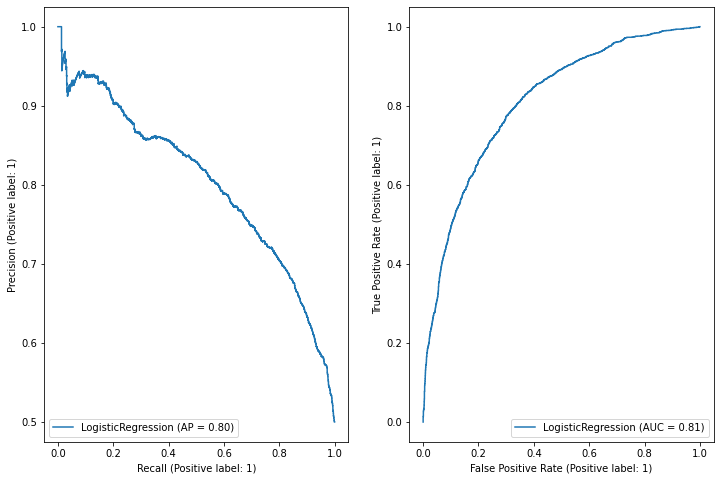

In [435]:
lr_sm = LogisticRegression(solver='liblinear')
lr_sm.fit(X_train, y_train)
y_pred = lr_sm.predict(X_test)
print(classification_report(y_test, y_pred))
proba = lr_sm.predict_proba(X_test)
proba = proba[:, 1]
score = np.round(roc_auc_score(y_test, proba), 2)
print(f'LogisticRegression roc_auc_score is {score}')
res['ROC_AUC_SMOTE'] = score
g, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

plot_precision_recall_curve(lr_sm, X_test, y_test, ax=ax1)
plot_roc_curve(lr_sm, X_test, y_test, ax=ax2);

Посмотрим табличку куда мы записывали значения ROC-AUC в зависимости от метода сэмплирования

In [436]:
res

,ROC_AUC_DB,ROC_AUC_US,ROC_AUC_OS,ROC_AUC_SMOTE
LogisticRegression,0.77,0.76,0.78,0.81


Как видно из результатов, лучшее значение у нас показала модель, которая использовала данные обработанные алгоритмом SMOTE.  

Сделаем тоже самое для других алгоритмов, и потом выберем лучший результат.

RandomForest

In [437]:
X = data.drop(['Exited'], axis=1)
y = data['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      2393
           1       0.75      0.38      0.51       607

    accuracy                           0.85      3000
   macro avg       0.80      0.67      0.71      3000
weighted avg       0.84      0.85      0.83      3000

RandomForest roc_auc_score is 0.82


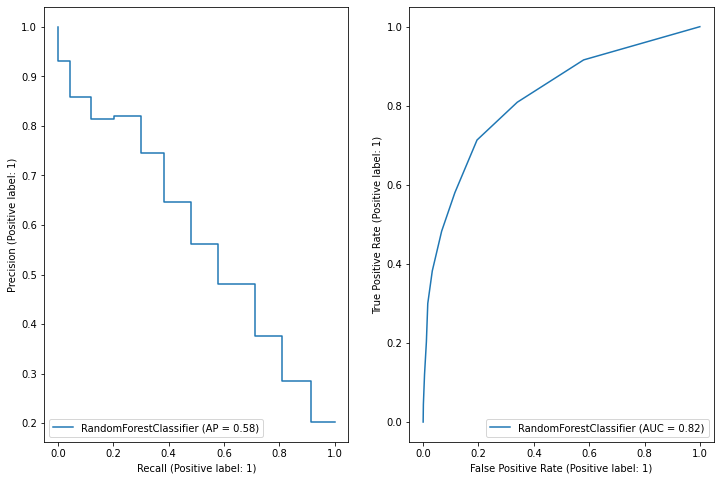

In [438]:
rf = RandomForestClassifier(class_weight = 'balanced', n_estimators = 10)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
proba = rf.predict_proba(X_test)
proba = proba[:, 1]
score = np.round(roc_auc_score(y_test, proba), 2)
print(f'RandomForest roc_auc_score is {score}')
resrf = pd.DataFrame([score], columns = ['ROC_AUC_DB'], index = ['RandomForest'])
g, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

plot_precision_recall_curve(rf, X_test, y_test, ax=ax1)
plot_roc_curve(rf, X_test, y_test, ax=ax2);

Undersampling

In [439]:
count_class_0, count_class_1 = data.Exited.value_counts()

class_0 = data[data['Exited'] == 0]
class_1 = data[data['Exited'] == 1]

In [440]:
class_0_under = class_0.sample(count_class_1)
test_under = pd.concat([class_0_under, class_1], axis=0)

print('Random undersampling:')
print(test_under.Exited.value_counts())

Random undersampling:
0    2037
1    2037
Name: Exited, dtype: int64


In [441]:
X = test_under.drop('Exited',axis='columns')
y = test_under['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15, stratify=y)

              precision    recall  f1-score   support

           0       0.74      0.83      0.78       612
           1       0.80      0.71      0.75       611

    accuracy                           0.77      1223
   macro avg       0.77      0.77      0.77      1223
weighted avg       0.77      0.77      0.77      1223

RandomForest roc_auc_score is 0.83


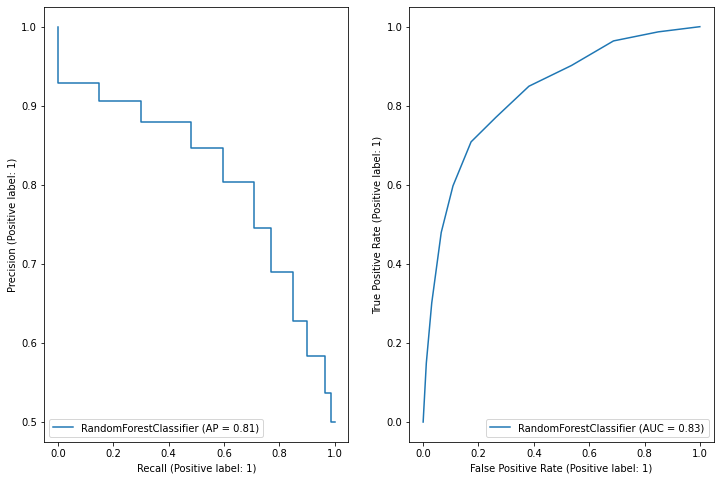

In [442]:
rf_us = RandomForestClassifier(class_weight = 'balanced', n_estimators = 10)
rf_us.fit(X_train, y_train)
y_pred = rf_us.predict(X_test)
print(classification_report(y_test, y_pred))
proba = rf_us.predict_proba(X_test)
proba = proba[:, 1]
score = np.round(roc_auc_score(y_test, proba), 2)
print(f'RandomForest roc_auc_score is {score}')
resrf['ROC_AUC_US'] = score
g, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

plot_precision_recall_curve(rf_us, X_test, y_test, ax=ax1)
plot_roc_curve(rf_us, X_test, y_test, ax=ax2);

Oversampling

In [443]:
class_1_over = class_1.sample(count_class_0, replace=True)
test_over = pd.concat([class_0, class_1_over], axis=0)

print('Random oversampling:')
print(test_over.Exited.value_counts())

Random oversampling:
0    7963
1    7963
Name: Exited, dtype: int64


In [444]:
X = test_over.drop('Exited',axis='columns')
y = test_over['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15, stratify=y)

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      2389
           1       0.92      0.96      0.94      2389

    accuracy                           0.94      4778
   macro avg       0.94      0.94      0.94      4778
weighted avg       0.94      0.94      0.94      4778

RandomForest roc_auc_score is 0.98


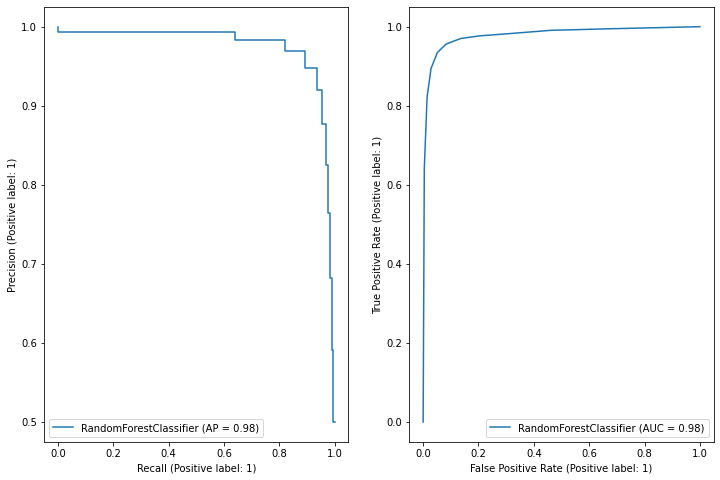

In [445]:
rf_os = RandomForestClassifier(class_weight = 'balanced', n_estimators = 10)
rf_os.fit(X_train, y_train)
y_pred = rf_os.predict(X_test)
print(classification_report(y_test, y_pred))
proba = rf_os.predict_proba(X_test)
proba = proba[:, 1]
score = np.round(roc_auc_score(y_test, proba), 2)
print(f'RandomForest roc_auc_score is {score}')
resrf['ROC_AUC_OS'] = score
g, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

plot_precision_recall_curve(rf_os, X_test, y_test, ax=ax1)
plot_roc_curve(rf_os, X_test, y_test, ax=ax2);

SMOTE

In [446]:
X = data.drop('Exited',axis='columns')
y = data['Exited']

In [447]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

In [448]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=15, stratify=y_sm)

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      2389
           1       0.89      0.85      0.87      2389

    accuracy                           0.87      4778
   macro avg       0.87      0.87      0.87      4778
weighted avg       0.87      0.87      0.87      4778

RandomForest roc_auc_score is 0.94


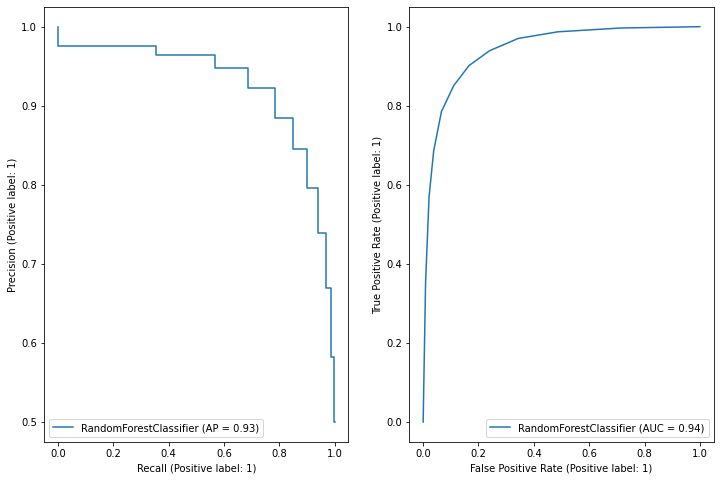

In [449]:
rf_sm = RandomForestClassifier(class_weight = 'balanced', n_estimators = 10)
rf_sm.fit(X_train, y_train)
y_pred = rf_sm.predict(X_test)
print(classification_report(y_test, y_pred))
proba = rf_sm.predict_proba(X_test)
proba = proba[:, 1]
score = np.round(roc_auc_score(y_test, proba), 2)
print(f'RandomForest roc_auc_score is {score}')
resrf['ROC_AUC_SMOTE'] = score
g, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

plot_precision_recall_curve(rf_sm, X_test, y_test, ax=ax1)
plot_roc_curve(rf_sm, X_test, y_test, ax=ax2);
res = res.append(resrf)

In [450]:
res

,ROC_AUC_DB,ROC_AUC_US,ROC_AUC_OS,ROC_AUC_SMOTE
LogisticRegression,0.77,0.76,0.78,0.81
RandomForest,0.82,0.83,0.98,0.94


XGBoost

In [451]:
X = data.drop(['Exited'], axis=1)
y = data['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      2393
           1       0.70      0.52      0.60       607

    accuracy                           0.86      3000
   macro avg       0.79      0.73      0.76      3000
weighted avg       0.85      0.86      0.85      3000

XGBoost roc_auc_score is 0.85


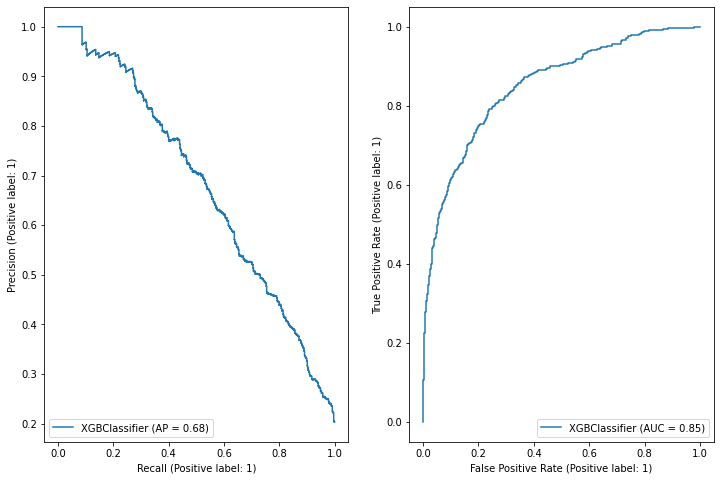

In [452]:
xgb = XGBClassifier(booster='gbtree',random_state = 1, eval_metric='auc')
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred))
proba = xgb.predict_proba(X_test)
proba = proba[:, 1]
score = np.round(roc_auc_score(y_test, proba), 2)
print(f'XGBoost roc_auc_score is {score}')
resxg = pd.DataFrame([score], columns = ['ROC_AUC_DB'], index = ['XGboost'])
g, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

plot_precision_recall_curve(xgb, X_test, y_test, ax=ax1)
plot_roc_curve(xgb, X_test, y_test, ax=ax2);

Undersampling

In [453]:
count_class_0, count_class_1 = data.Exited.value_counts()

class_0 = data[data['Exited'] == 0]
class_1 = data[data['Exited'] == 1]

In [454]:
class_0_under = class_0.sample(count_class_1)
test_under = pd.concat([class_0_under, class_1], axis=0)

print('Random undersampling:')
print(test_under.Exited.value_counts())

Random undersampling:
0    2037
1    2037
Name: Exited, dtype: int64


In [455]:
X = test_under.drop('Exited',axis='columns')
y = test_under['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15, stratify=y)

              precision    recall  f1-score   support

           0       0.74      0.73      0.74       612
           1       0.74      0.74      0.74       611

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223

XGBoost roc_auc_score is 0.82


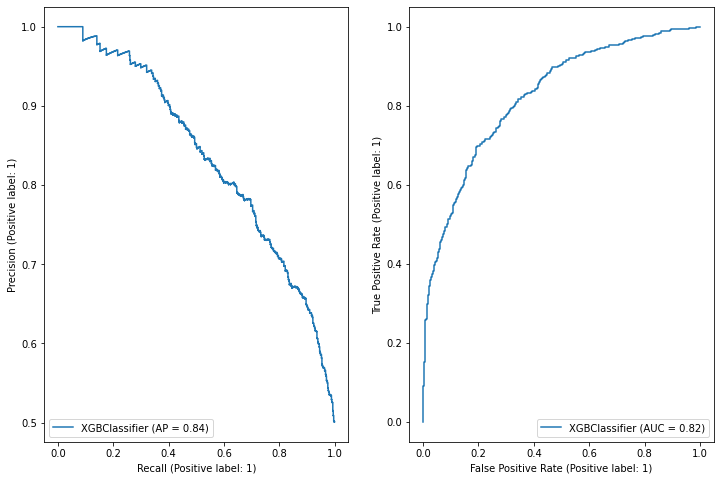

In [456]:
xgb_us = XGBClassifier(booster='gbtree',random_state = 1, eval_metric='auc')
xgb_us.fit(X_train, y_train)
y_pred = xgb_us.predict(X_test)

print(classification_report(y_test, y_pred))
proba = xgb_us.predict_proba(X_test)
proba = proba[:, 1]
score = np.round(roc_auc_score(y_test, proba), 2)
print(f'XGBoost roc_auc_score is {score}')
resxg['ROC_AUC_US'] = score
g, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

plot_precision_recall_curve(xgb_us, X_test, y_test, ax=ax1)
plot_roc_curve(xgb_us, X_test, y_test, ax=ax2);

Oversampling

In [457]:
class_1_over = class_1.sample(count_class_0, replace=True)
test_over = pd.concat([class_0, class_1_over], axis=0)

print('Random oversampling:')
print(test_over.Exited.value_counts())

Random oversampling:
0    7963
1    7963
Name: Exited, dtype: int64


In [458]:
X = test_over.drop('Exited',axis='columns')
y = test_over['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15, stratify=y)

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      2389
           1       0.88      0.91      0.89      2389

    accuracy                           0.89      4778
   macro avg       0.89      0.89      0.89      4778
weighted avg       0.89      0.89      0.89      4778

XGBoost roc_auc_score is 0.95


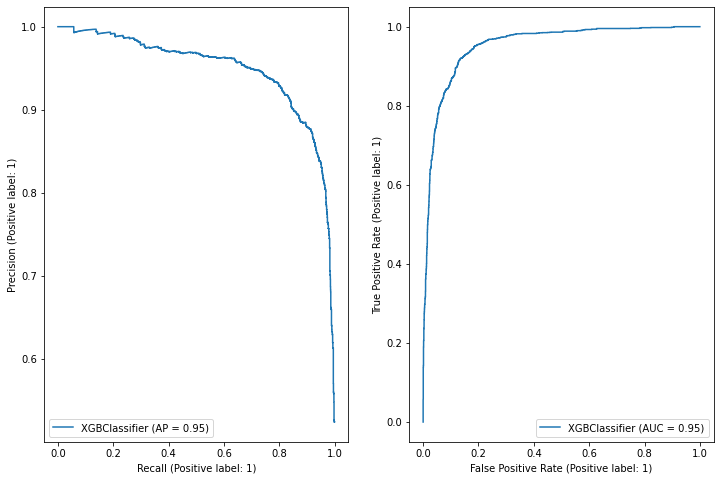

In [459]:
xgb_os = XGBClassifier(booster='gbtree',random_state = 1, eval_metric='auc')
xgb_os.fit(X_train, y_train)
y_pred = xgb_os.predict(X_test)

print(classification_report(y_test, y_pred))
proba = xgb_os.predict_proba(X_test)
proba = proba[:, 1]
score = np.round(roc_auc_score(y_test, proba), 2)
print(f'XGBoost roc_auc_score is {score}')
resxg['ROC_AUC_OS'] = score
g, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

plot_precision_recall_curve(xgb_os, X_test, y_test, ax=ax1)
plot_roc_curve(xgb_os, X_test, y_test, ax=ax2);

SMOTE

In [460]:
X = data.drop('Exited',axis='columns')
y = data['Exited']

In [461]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

In [462]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=15, stratify=y_sm)

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      2389
           1       0.93      0.89      0.91      2389

    accuracy                           0.91      4778
   macro avg       0.91      0.91      0.91      4778
weighted avg       0.91      0.91      0.91      4778

XGBoost roc_auc_score is 0.97


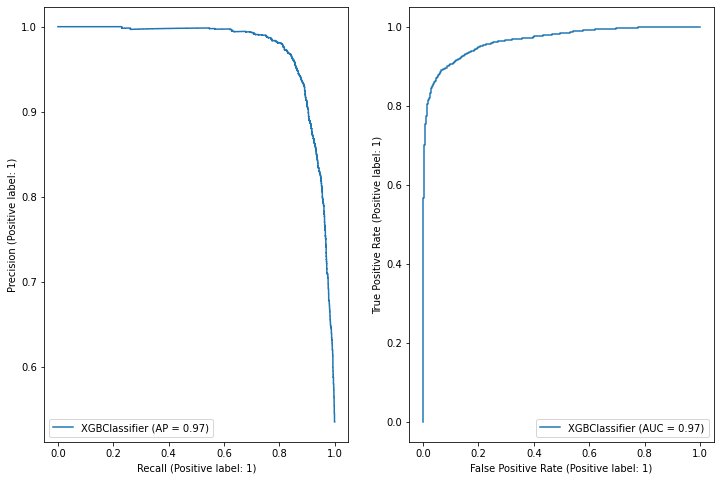

In [463]:
xgb_sm = XGBClassifier(booster='gbtree',random_state = 1, eval_metric='auc')
xgb_sm.fit(X_train, y_train)
y_pred = xgb_sm.predict(X_test)

print(classification_report(y_test, y_pred))
proba = xgb_sm.predict_proba(X_test)
proba = proba[:, 1]
score = np.round(roc_auc_score(y_test, proba), 2)
print(f'XGBoost roc_auc_score is {score}')
resxg['ROC_AUC_SMOTE'] = score
g, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

plot_precision_recall_curve(xgb_sm, X_test, y_test, ax=ax1)
plot_roc_curve(xgb_sm, X_test, y_test, ax=ax2);
res = res.append(resxg)

In [464]:
res

,ROC_AUC_DB,ROC_AUC_US,ROC_AUC_OS,ROC_AUC_SMOTE
LogisticRegression,0.77,0.76,0.78,0.81
RandomForest,0.82,0.83,0.98,0.94
XGboost,0.85,0.82,0.95,0.97


LGBM

In [465]:
X = data.drop(['Exited'], axis=1)
y = data['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

              precision    recall  f1-score   support

           0       0.92      0.85      0.88      2393
           1       0.54      0.72      0.62       607

    accuracy                           0.82      3000
   macro avg       0.73      0.78      0.75      3000
weighted avg       0.85      0.82      0.83      3000

LGBM roc_auc_score is 0.86


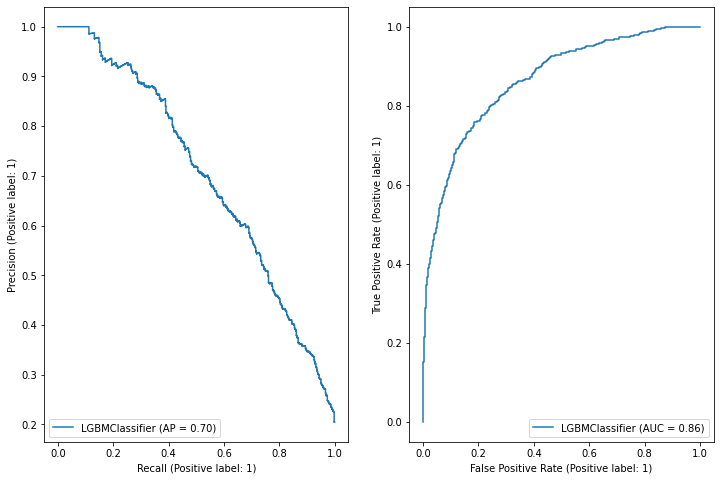

In [466]:
lgbm = LGBMClassifier(class_weight='balanced', random_state = 1)
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)

print(classification_report(y_test, y_pred))
proba = lgbm.predict_proba(X_test)
proba = proba[:, 1]
score = np.round(roc_auc_score(y_test, proba), 2)
print(f'LGBM roc_auc_score is {score}')
reslgb = pd.DataFrame([score], columns = ['ROC_AUC_DB'], index = ['LGBM'])
g, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

plot_precision_recall_curve(lgbm, X_test, y_test, ax=ax1)
plot_roc_curve(lgbm, X_test, y_test, ax=ax2);

Undersampling

In [467]:
count_class_0, count_class_1 = data.Exited.value_counts()

class_0 = data[data['Exited'] == 0]
class_1 = data[data['Exited'] == 1]

In [468]:
class_0_under = class_0.sample(count_class_1)
test_under = pd.concat([class_0_under, class_1], axis=0)

print('Random undersampling:')
print(test_under.Exited.value_counts())

Random undersampling:
0    2037
1    2037
Name: Exited, dtype: int64


In [469]:
X = test_under.drop('Exited',axis='columns')
y = test_under['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15, stratify=y)

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       612
           1       0.78      0.76      0.77       611

    accuracy                           0.77      1223
   macro avg       0.77      0.77      0.77      1223
weighted avg       0.77      0.77      0.77      1223

LGBM roc_auc_score is 0.86


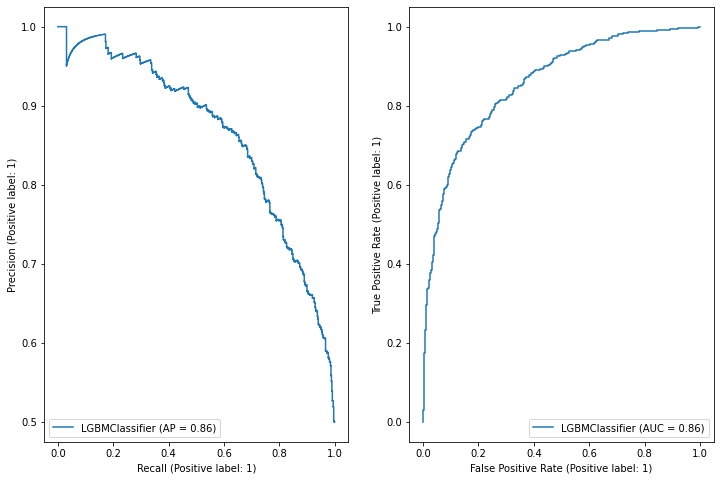

In [470]:
lgbm_us = LGBMClassifier(class_weight='balanced', random_state = 1)
lgbm_us.fit(X_train, y_train)
y_pred = lgbm_us.predict(X_test)

print(classification_report(y_test, y_pred))
proba = lgbm_us.predict_proba(X_test)
proba = proba[:, 1]
score = np.round(roc_auc_score(y_test, proba), 2)
print(f'LGBM roc_auc_score is {score}')
reslgb['ROC_AUC_US'] = score
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

plot_precision_recall_curve(lgbm_us, X_test, y_test, ax=ax1)
plot_roc_curve(lgbm_us, X_test, y_test, ax=ax2);

Oversampling

In [471]:
class_1_over = class_1.sample(count_class_0, replace=True)
test_over = pd.concat([class_0, class_1_over], axis=0)

print('Random over-sampling:')
print(test_over.Exited.value_counts())

Random over-sampling:
0    7963
1    7963
Name: Exited, dtype: int64


In [472]:
X = test_over.drop('Exited',axis='columns')
y = test_over['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15, stratify=y)

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      2389
           1       0.86      0.87      0.86      2389

    accuracy                           0.86      4778
   macro avg       0.86      0.86      0.86      4778
weighted avg       0.86      0.86      0.86      4778

LGBM roc_auc_score is 0.94


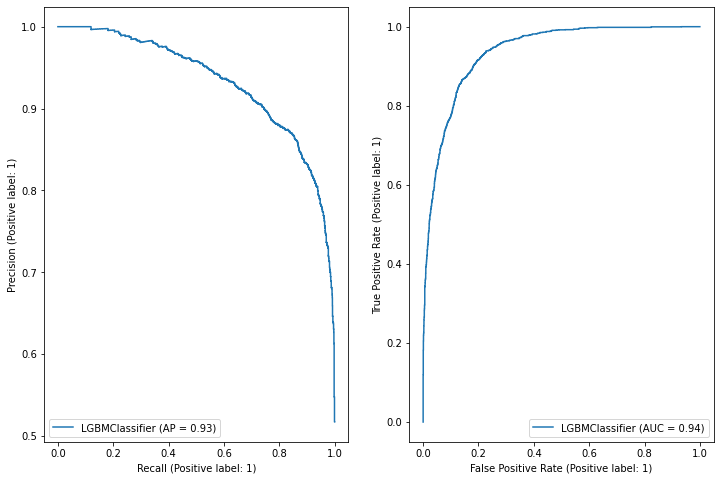

In [473]:
lgbm_os = LGBMClassifier(class_weight='balanced', random_state = 1)
lgbm_os.fit(X_train, y_train)
y_pred = lgbm_os.predict(X_test)

print(classification_report(y_test, y_pred))
proba = lgbm_os.predict_proba(X_test)
proba = proba[:, 1]
score = np.round(roc_auc_score(y_test, proba), 2)
print(f'LGBM roc_auc_score is {score}')
reslgb['ROC_AUC_OS'] = score
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

plot_precision_recall_curve(lgbm_os, X_test, y_test, ax=ax1)
plot_roc_curve(lgbm_os, X_test, y_test, ax=ax2);

SMOTE

In [474]:
X = data.drop('Exited',axis='columns')
y = data['Exited']

In [475]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

In [476]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=15, stratify=y_sm)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      2389
           1       0.93      0.89      0.91      2389

    accuracy                           0.91      4778
   macro avg       0.91      0.91      0.91      4778
weighted avg       0.91      0.91      0.91      4778

LGBM roc_auc_score is 0.97


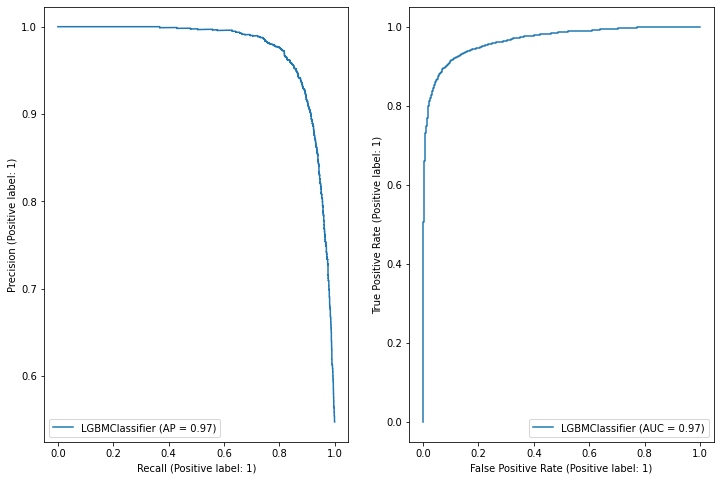

In [477]:
lgbm_sm = LGBMClassifier(class_weight='balanced', random_state = 1)
lgbm_sm.fit(X_train, y_train)
y_pred = lgbm_sm.predict(X_test)

print(classification_report(y_test, y_pred))
proba = lgbm_sm.predict_proba(X_test)
proba = proba[:, 1]
score = np.round(roc_auc_score(y_test, proba), 2)
print(f'LGBM roc_auc_score is {score}')
reslgb['ROC_AUC_SMOTE'] = score
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

plot_precision_recall_curve(lgbm_sm, X_test, y_test, ax=ax1)
plot_roc_curve(lgbm_sm, X_test, y_test, ax=ax2);
res = res.append(reslgb)

In [478]:
res

,ROC_AUC_DB,ROC_AUC_US,ROC_AUC_OS,ROC_AUC_SMOTE
LogisticRegression,0.77,0.76,0.78,0.81
RandomForest,0.82,0.83,0.98,0.94
XGboost,0.85,0.82,0.95,0.97
LGBM,0.86,0.86,0.94,0.97


Catboost  

In [479]:
X = data.drop(['Exited'], axis=1)
y = data['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2393
           1       0.75      0.50      0.60       607

    accuracy                           0.86      3000
   macro avg       0.82      0.73      0.76      3000
weighted avg       0.86      0.86      0.85      3000

Catboost roc_auc_score is 0.87


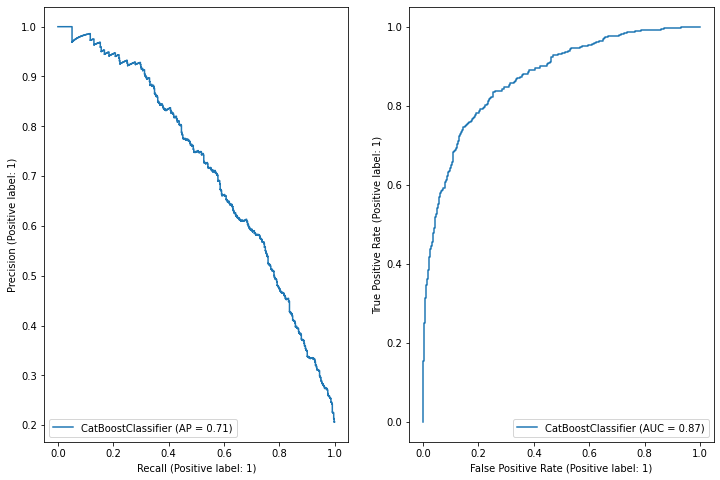

In [480]:
cb = CatBoostClassifier(loss_function='Logloss', random_state = 1)

cb.fit(X_train, y_train, verbose = False)

y_pred = cb.predict(X_test)

print(classification_report(y_test, y_pred))
proba = cb.predict_proba(X_test)
proba = proba[:, 1]
score = np.round(roc_auc_score(y_test, proba), 2)
print(f'Catboost roc_auc_score is {score}')
rescat = pd.DataFrame([score], columns = ['ROC_AUC_DB'], index = ['Catboost'])
g, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

plot_precision_recall_curve(cb, X_test, y_test, ax=ax1)
plot_roc_curve(cb, X_test, y_test, ax=ax2);

Undersampling

In [481]:
count_class_0, count_class_1 = data.Exited.value_counts()

class_0 = data[data['Exited'] == 0]
class_1 = data[data['Exited'] == 1]

In [482]:
class_0_under = class_0.sample(count_class_1)
test_under = pd.concat([class_0_under, class_1], axis=0)

print('Random undersampling:')
print(test_under.Exited.value_counts())

Random undersampling:
0    2037
1    2037
Name: Exited, dtype: int64


In [483]:
X = test_under.drop('Exited',axis='columns')
y = test_under['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15, stratify=y)

              precision    recall  f1-score   support

           0       0.77      0.78      0.77       612
           1       0.77      0.76      0.77       611

    accuracy                           0.77      1223
   macro avg       0.77      0.77      0.77      1223
weighted avg       0.77      0.77      0.77      1223

Catboost roc_auc_score is 0.86


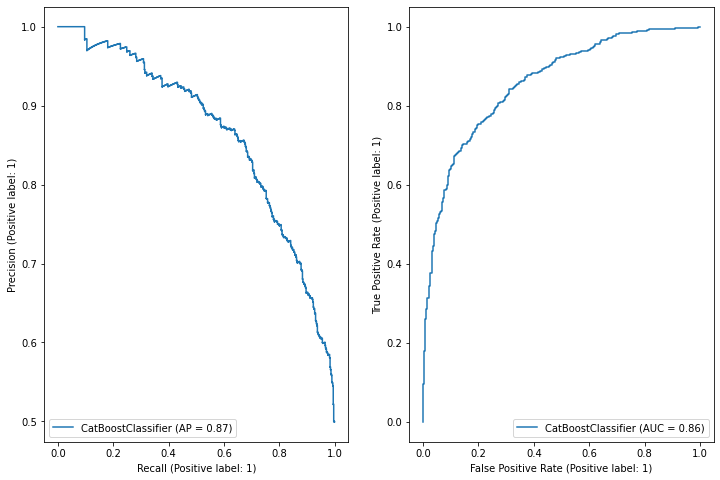

In [484]:
cb_us = CatBoostClassifier(loss_function='Logloss', random_state = 1)

cb_us.fit(X_train, y_train, verbose = False)

y_pred = cb_us.predict(X_test)

print(classification_report(y_test, y_pred))
proba = cb_us.predict_proba(X_test)
proba = proba[:, 1]
score = np.round(roc_auc_score(y_test, proba), 2)
print(f'Catboost roc_auc_score is {score}')
rescat['ROC_AUC_US']  = score
g, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

plot_precision_recall_curve(cb_us, X_test, y_test, ax=ax1)
plot_roc_curve(cb_us, X_test, y_test, ax=ax2);

Oversampling

In [485]:
class_1_over = class_1.sample(count_class_0, replace=True)
test_over = pd.concat([class_0, class_1_over], axis=0)

print('Random oversampling:')
print(test_over.Exited.value_counts())

Random oversampling:
0    7963
1    7963
Name: Exited, dtype: int64


In [486]:
X = test_over.drop('Exited',axis='columns')
y = test_over['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15, stratify=y)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      2389
           1       0.85      0.85      0.85      2389

    accuracy                           0.85      4778
   macro avg       0.85      0.85      0.85      4778
weighted avg       0.85      0.85      0.85      4778

Catboost roc_auc_score is 0.93


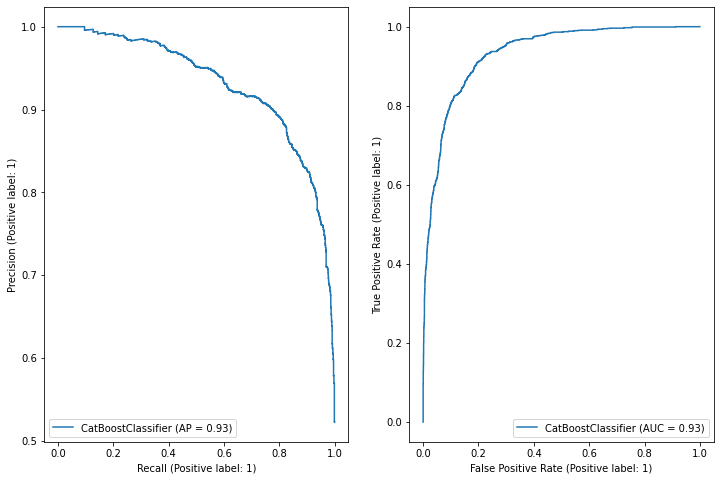

In [487]:
cb_os = CatBoostClassifier(loss_function='Logloss', random_state = 1)

cb_os.fit(X_train, y_train, verbose = False)

y_pred = cb_os.predict(X_test)

print(classification_report(y_test, y_pred))
proba = cb_os.predict_proba(X_test)
proba = proba[:, 1]
score = np.round(roc_auc_score(y_test, proba), 2)
print(f'Catboost roc_auc_score is {score}')
rescat['ROC_AUC_OS']  = score
g, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

plot_precision_recall_curve(cb_os, X_test, y_test, ax=ax1)
plot_roc_curve(cb_os, X_test, y_test, ax=ax2);

SMOTE

In [488]:
X = data.drop('Exited',axis='columns')
y = data['Exited']

In [489]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

In [490]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=15, stratify=y_sm)

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      2389
           1       0.93      0.89      0.91      2389

    accuracy                           0.91      4778
   macro avg       0.91      0.91      0.91      4778
weighted avg       0.91      0.91      0.91      4778

Catboost roc_auc_score is 0.97


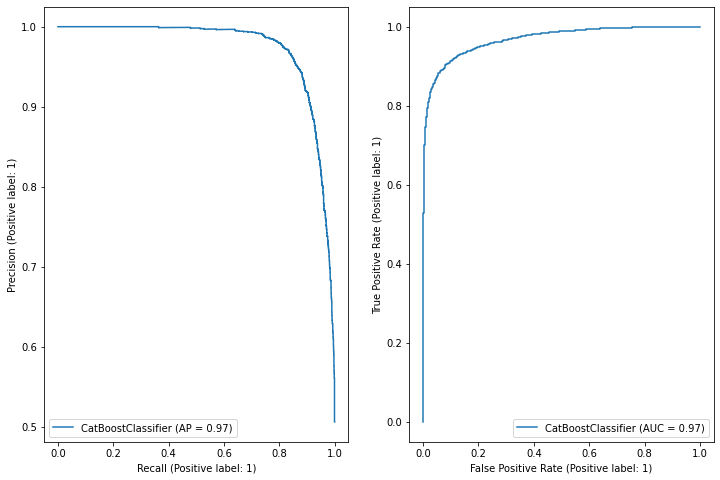

In [491]:
cb_sm = CatBoostClassifier(loss_function='Logloss', random_state = 1)

cb_sm.fit(X_train, y_train, verbose = False)

y_pred = cb_sm.predict(X_test)

print(classification_report(y_test, y_pred))
proba = cb_sm.predict_proba(X_test)
proba = proba[:, 1]
score = np.round(roc_auc_score(y_test, proba), 2)
print(f'Catboost roc_auc_score is {score}')
rescat['ROC_AUC_SMOTE']  = score
g, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

plot_precision_recall_curve(cb_sm, X_test, y_test, ax=ax1)
plot_roc_curve(cb_sm, X_test, y_test, ax=ax2);
res = res.append(rescat)

In [492]:
res

,ROC_AUC_DB,ROC_AUC_US,ROC_AUC_OS,ROC_AUC_SMOTE
LogisticRegression,0.77,0.76,0.78,0.81
RandomForest,0.82,0.83,0.98,0.94
XGboost,0.85,0.82,0.95,0.97
LGBM,0.86,0.86,0.94,0.97
Catboost,0.87,0.86,0.93,0.97


Из таблицы видно, что лучшее значение ROC-AUC у модели RandomForest с использование Oversampling, на втором месте Catboost с использование SMOTE

Возьмем RandomForest и Catboost, выберем гиперпараметры с помощью Gridsearch и RandomizedSearch

{'criterion': 'gini', 'max_depth': 12, 'n_estimators': 100}
0.858 (+/-0.008) for {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 60}
0.858 (+/-0.007) for {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 80}
0.858 (+/-0.007) for {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 100}
0.858 (+/-0.007) for {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 120}
0.869 (+/-0.008) for {'criterion': 'gini', 'max_depth': 6, 'n_estimators': 60}
0.870 (+/-0.008) for {'criterion': 'gini', 'max_depth': 6, 'n_estimators': 80}
0.870 (+/-0.007) for {'criterion': 'gini', 'max_depth': 6, 'n_estimators': 100}
0.869 (+/-0.007) for {'criterion': 'gini', 'max_depth': 6, 'n_estimators': 120}
0.880 (+/-0.007) for {'criterion': 'gini', 'max_depth': 7, 'n_estimators': 60}
0.881 (+/-0.006) for {'criterion': 'gini', 'max_depth': 7, 'n_estimators': 80}
0.881 (+/-0.006) for {'criterion': 'gini', 'max_depth': 7, 'n_estimators': 100}
0.881 (+/-0.006) for {'criterion': 'gini', 'max_depth': 7, 'n_esti

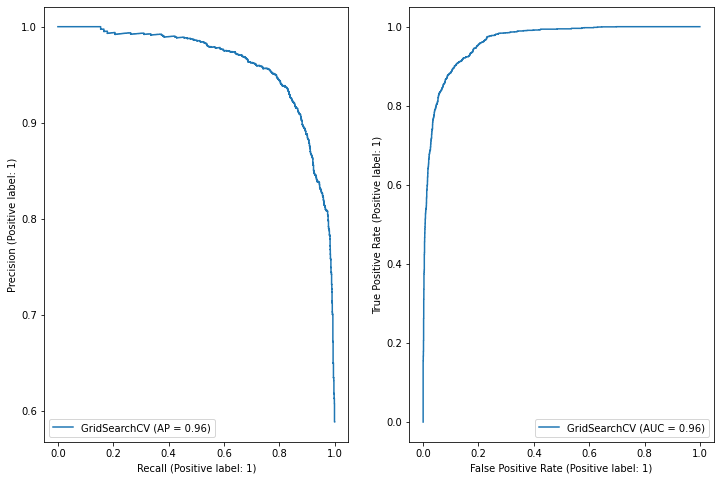

In [493]:
class_1_over = class_1.sample(count_class_0, replace=True)
test_over = pd.concat([class_0, class_1_over], axis=0)
X = test_over.drop('Exited',axis='columns')
y = test_over['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15, stratify=y)

parameters = {"n_estimators": list(range(60,121,20)), 
                    "max_depth": list(range(5,13,1)), 
                    "criterion": ['gini', 'entropy']}

rand_forest = GridSearchCV(RandomForestClassifier(random_state=101), 
                   parameters, scoring ='roc_auc', cv=5)
rand_forest.fit(X_train, y_train)
print(rand_forest.best_params_)
means = rand_forest.cv_results_["mean_test_score"]
stds = rand_forest.cv_results_["std_test_score"]
for mean, std, params in zip(means, stds, rand_forest.cv_results_["params"]):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
y_pred = rand_forest.predict(X_test)
print(classification_report(y_test, y_pred))
proba = rand_forest.predict_proba(X_test)
proba = proba[:, 1]
score = np.round(roc_auc_score(y_test, proba), 2)
print(f'Roc_auc_score is {score}')
g, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

plot_precision_recall_curve(rand_forest, X_test, y_test, ax=ax1)
plot_roc_curve(rand_forest, X_test, y_test, ax=ax2);

In [494]:
X = data.drop('Exited',axis='columns')
y = data['Exited']
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=15, stratify=y_sm)

In [495]:
cbc = CatBoostClassifier(loss_function='Logloss', random_state = 1)
skf = StratifiedShuffleSplit(n_splits = 5, random_state = 1)
grid = {'max_depth': [3,4,5],'n_estimators':[100, 200, 300]}
gscv = GridSearchCV (estimator = cbc, param_grid = grid, scoring ='roc_auc', cv = skf, verbose = True, n_jobs = -1)
gscv.fit(X_sm,y_sm)
best_params = gscv.best_estimator_.get_params()
print(gscv.best_score_)
print(best_params)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Learning rate set to 0.265271
Learning rate set to 0.265271
Learning rate set to 0.265271
Learning rate set to 0.265271
0:	learn: 0.6285035	total: 54ms	remaining: 5.34s
1:	learn: 0.5799635	total: 56.1ms	remaining: 2.75s
2:	learn: 0.5512811	total: 58.4ms	remaining: 1.89s
3:	learn: 0.5319641	total: 60.3ms	remaining: 1.45s
4:	learn: 0.5147527	total: 62.4ms	remaining: 1.19s
5:	learn: 0.4993383	total: 64.1ms	remaining: 1s
6:	learn: 0.4894208	total: 65.9ms	remaining: 875ms
7:	learn: 0.4810636	total: 67.7ms	remaining: 778ms
8:	learn: 0.4711777	total: 69.5ms	remaining: 702ms
9:	learn: 0.4646097	total: 71.2ms	remaining: 641ms
10:	learn: 0.4551382	total: 78.1ms	remaining: 632ms
0:	learn: 0.6286044	total: 55.1ms	remaining: 5.45s
11:	learn: 0.4500308	total: 81.6ms	remaining: 599ms
0:	learn: 0.6287926	total: 56.9ms	remaining: 5.64s
12:	learn: 0.4448419	total: 85.8ms	remaining: 574ms
1:	learn: 0.5803168	total: 65.2ms	remaining: 3.2s
0:	lear

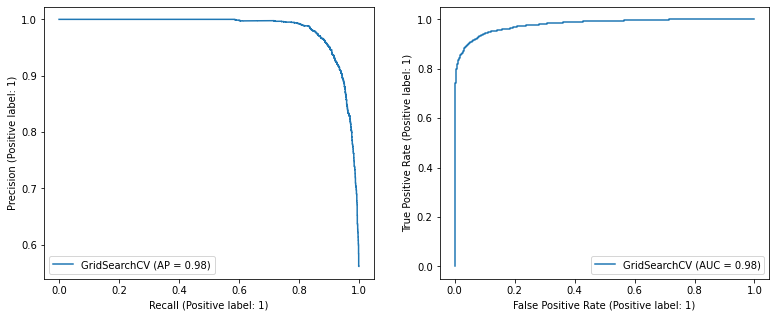

In [496]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))
plot_precision_recall_curve(gscv, X_test, y_test, ax=ax1)
plot_roc_curve(gscv, X_test, y_test, ax=ax2);

In [497]:
model = CatBoostClassifier(loss_function='Logloss', random_state = 1)
parameters = {'max_depth'         : sp_randInt(4, 10),
                'learning_rate' : sp_randFloat(),
                'n_estimators'    : sp_randInt(10, 100)
                 }
randm = RandomizedSearchCV(estimator=model, param_distributions = parameters,
                            cv = 2, n_iter = 10, n_jobs=-1)
randm.fit(X_train, y_train)

best_params = randm.best_estimator_.get_params()
print(randm.best_estimator_)
print(randm.best_score_)
print(best_params)

0:	learn: 0.4920486	total: 4.02ms	remaining: 366ms
0:	learn: 0.5087575	total: 7.63ms	remaining: 694ms
1:	learn: 0.4503405	total: 7.6ms	remaining: 342ms
1:	learn: 0.4534867	total: 13.8ms	remaining: 622ms
2:	learn: 0.4317117	total: 16ms	remaining: 474ms
2:	learn: 0.4344808	total: 21.1ms	remaining: 627ms
0:	learn: 0.5732761	total: 24ms	remaining: 1.13s
0:	learn: 0.5616876	total: 25.7ms	remaining: 1.21s
3:	learn: 0.4151136	total: 26.6ms	remaining: 584ms
1:	learn: 0.5031772	total: 30.2ms	remaining: 694ms
1:	learn: 0.5086227	total: 31.9ms	remaining: 734ms
2:	learn: 0.4848709	total: 34.9ms	remaining: 524ms
4:	learn: 0.4073525	total: 39.8ms	remaining: 692ms
3:	learn: 0.4656106	total: 37.9ms	remaining: 417ms
3:	learn: 0.4200735	total: 41ms	remaining: 902ms
4:	learn: 0.4474682	total: 41.1ms	remaining: 354ms
4:	learn: 0.4105875	total: 44.7ms	remaining: 778ms
2:	learn: 0.4761995	total: 52.2ms	remaining: 782ms
5:	learn: 0.4007229	total: 49.2ms	remaining: 705ms
5:	learn: 0.4043607	total: 47.9ms	rema

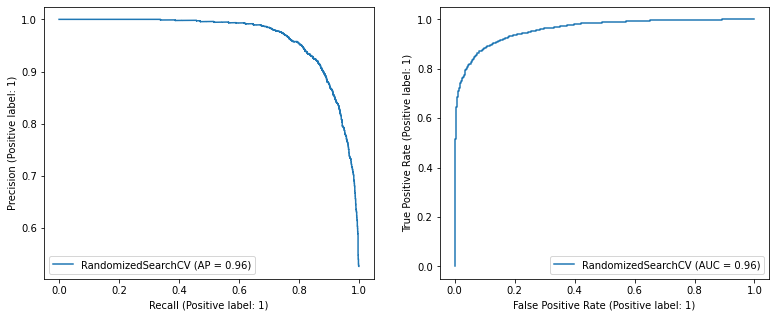

In [498]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))
plot_precision_recall_curve(randm, X_test, y_test, ax=ax1)
plot_roc_curve(randm, X_test, y_test, ax=ax2);

Посмотрим какие на важность признаков при построении модели

Text(0.5, 1.0, 'Feature Importance')

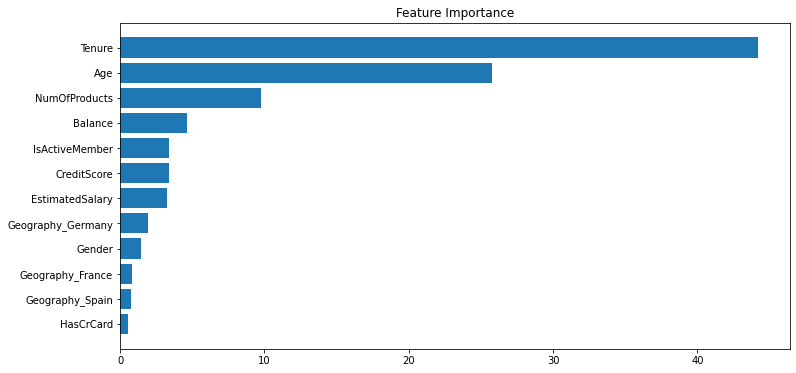

In [499]:
feature_importance = cb_sm.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

Text(0.5, 1.0, 'Permutation Importance')

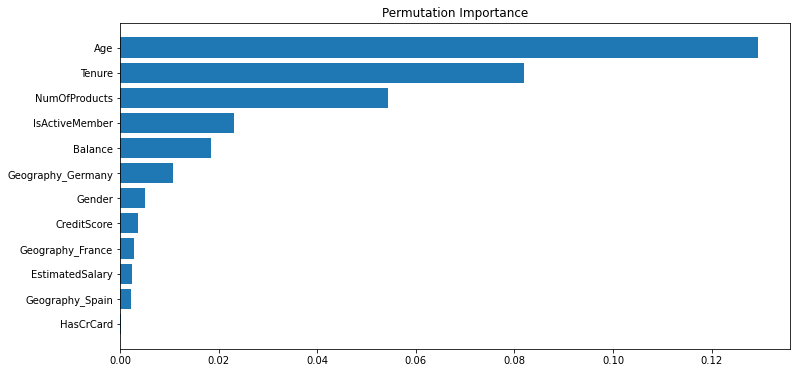

In [500]:
perm_importance = permutation_importance(cb_sm, X_test, y_test, n_repeats=10, random_state=1066)
sorted_idx = perm_importance.importances_mean.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Permutation Importance')

В проекте была проведена работа с данными, посмотрел на выбросы в данных, зависимость признаков от целевой переменной.  
Были построены модели машинного обучения. Лучшее значение ROC-AUC: RandomForest с использование Oversampling, Catboost с использование SMOTE.  
Для этих моделей был сделан подбор гипперпараметров (GridSearch, RandomSearch).
